In [4]:
import pandas as pd

# Load your dataset
df = pd.read_csv('swiggy.csv')

# Display the first few rows of the dataframe
print(df.head())


    ID         Area       City         Restaurant  Price  Avg ratings  \
0  211  Koramangala  Bangalore        Tandoor Hut  300.0          4.4   
1  221  Koramangala  Bangalore      Tunday Kababi  300.0          4.1   
2  246    Jogupalya  Bangalore            Kim Lee  650.0          4.4   
3  248  Indiranagar  Bangalore  New Punjabi Hotel  250.0          3.9   
4  249  Indiranagar  Bangalore                Nh8  350.0          4.0   

   Total ratings                                          Food type  \
0            100          Biryani,Chinese,North Indian,South Indian   
1            100                                   Mughlai,Lucknowi   
2            100                                            Chinese   
3            500               North Indian,Punjabi,Tandoor,Chinese   
4             50  Rajasthani,Gujarati,North Indian,Snacks,Desser...   

        Address  Delivery time  
0     5Th Block             59  
1     5Th Block             56  
2   Double Road             50  
3 

# Clean and Summarize the Data

In [5]:
# Get a concise summary of the dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8680 entries, 0 to 8679
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             8680 non-null   int64  
 1   Area           8680 non-null   object 
 2   City           8680 non-null   object 
 3   Restaurant     8680 non-null   object 
 4   Price          8680 non-null   float64
 5   Avg ratings    8680 non-null   float64
 6   Total ratings  8680 non-null   int64  
 7   Food type      8680 non-null   object 
 8   Address        8680 non-null   object 
 9   Delivery time  8680 non-null   int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 678.2+ KB
None


In [8]:
# Get statistical summary of numeric columns
print(df.describe())

                  ID        Price  Avg ratings  Total ratings  Delivery time
count    8680.000000  8680.000000  8680.000000    8680.000000    8680.000000
mean   244812.071429   348.444470     3.655104     156.634793      53.967051
std    158671.617188   230.940074     0.647629     391.448014      14.292335
min       211.000000     0.000000     2.000000      20.000000      20.000000
25%     72664.000000   200.000000     2.900000      50.000000      44.000000
50%    283442.000000   300.000000     3.900000      80.000000      53.000000
75%    393425.250000   400.000000     4.200000     100.000000      64.000000
max    466928.000000  2500.000000     5.000000   10000.000000     109.000000


In [7]:
# For categorical data, use include='object' to get summaries
print(df.describe(include='object'))

          Area     City       Restaurant Food type Address
count     8680     8680             8680      8680    8680
unique     833        9             7865      3734    2339
top     Rohini  Kolkata  La Pino'Z Pizza    Indian  Rohini
freq       257     1346               13       389     229


In [9]:
# Check for missing values
print(df.isnull().sum())

ID               0
Area             0
City             0
Restaurant       0
Price            0
Avg ratings      0
Total ratings    0
Food type        0
Address          0
Delivery time    0
dtype: int64


### data is clean , we can now proceed to next step
# EDA

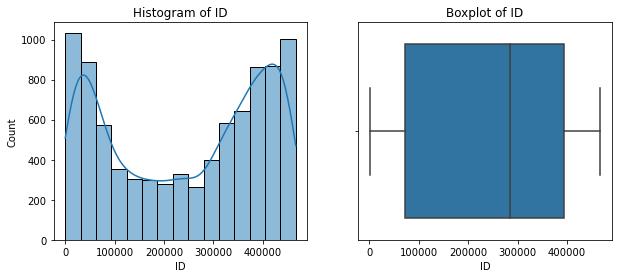

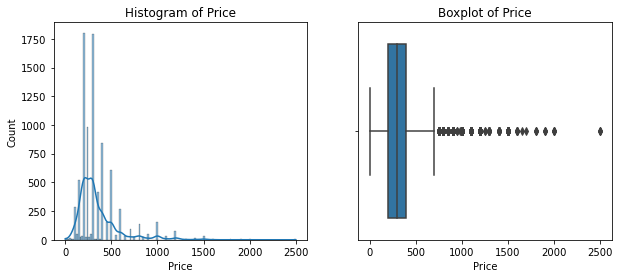

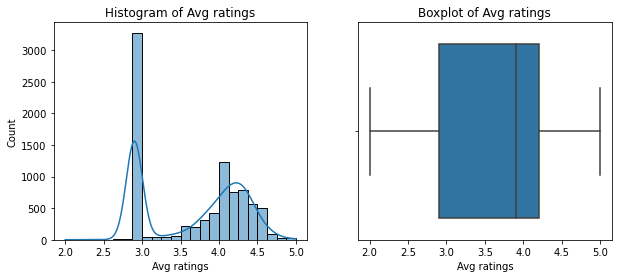

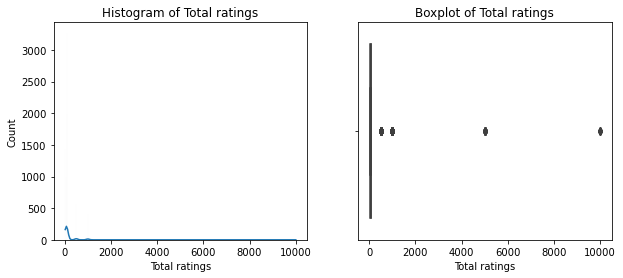

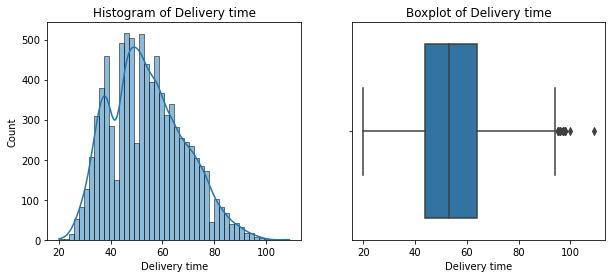

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histograms or boxplots for numeric data
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df[column], kde=True)
    plt.title('Histogram of ' + column)
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[column])
    plt.title('Boxplot of ' + column)
    plt.show()

Kolkata      1346
Mumbai       1277
Chennai      1106
Pune         1090
Hyderabad    1075
Bangalore     946
Ahmedabad     717
Delhi         611
Surat         512
Name: City, dtype: int64


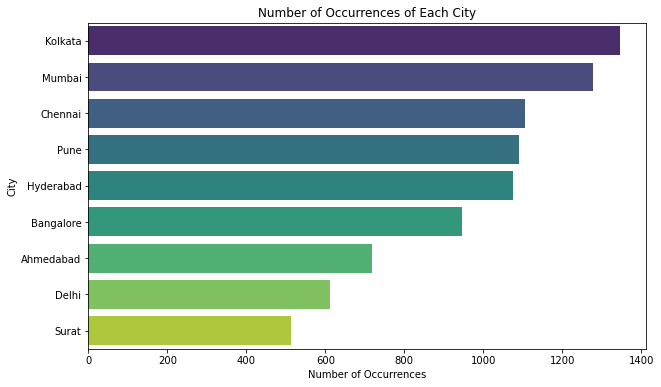

In [12]:
# Count occurrences of each city
city_counts = df['City'].value_counts()
print(city_counts)
# Plot histogram using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=city_counts.values, y=city_counts.index, palette='viridis')
plt.title('Number of Occurrences of Each City')
plt.xlabel('Number of Occurrences')
plt.ylabel('City')
plt.show()

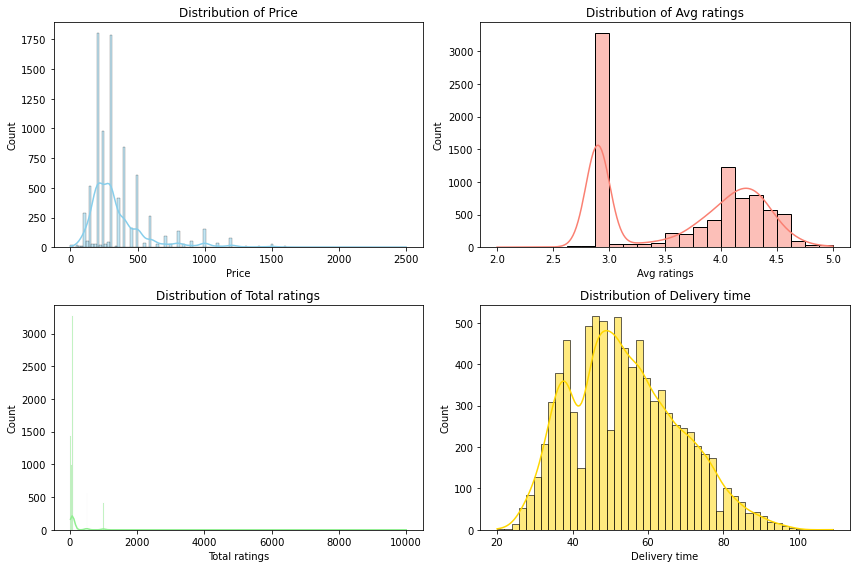

In [13]:
# Visualize the distribution of numerical variables
plt.figure(figsize=(12, 8))

# Plot Price distribution
plt.subplot(2, 2, 1)
sns.histplot(df['Price'], kde=True, color='skyblue')
plt.title('Distribution of Price')

# Plot Avg ratings distribution
plt.subplot(2, 2, 2)
sns.histplot(df['Avg ratings'], kde=True, color='salmon')
plt.title('Distribution of Avg ratings')

# Plot Total ratings distribution
plt.subplot(2, 2, 3)
sns.histplot(df['Total ratings'], kde=True, color='lightgreen')
plt.title('Distribution of Total ratings')

# Plot Delivery time distribution
plt.subplot(2, 2, 4)
sns.histplot(df['Delivery time'], kde=True, color='gold')
plt.title('Distribution of Delivery time')

plt.tight_layout()
plt.show()


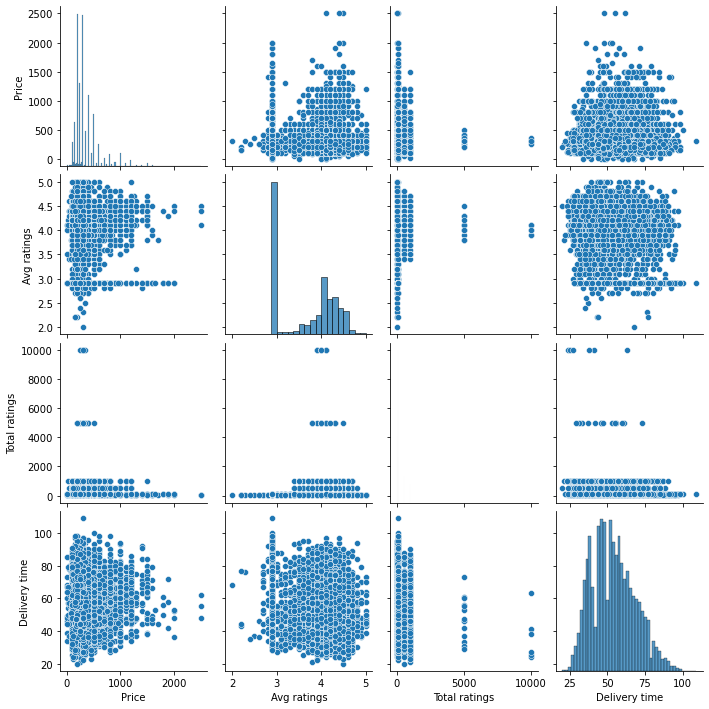

In [14]:
# Pairwise scatter plots
sns.pairplot(df[['Price', 'Avg ratings', 'Total ratings', 'Delivery time']])
plt.show()

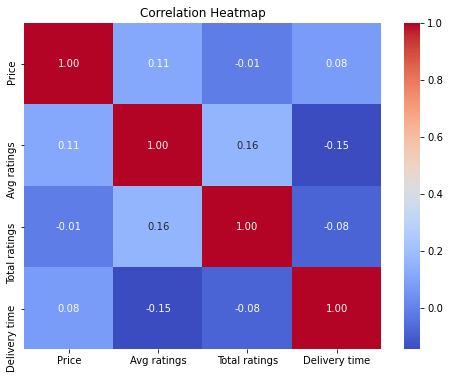

In [15]:
# Calculate correlation matrix
correlation_matrix = df[['Price', 'Avg ratings', 'Total ratings', 'Delivery time']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

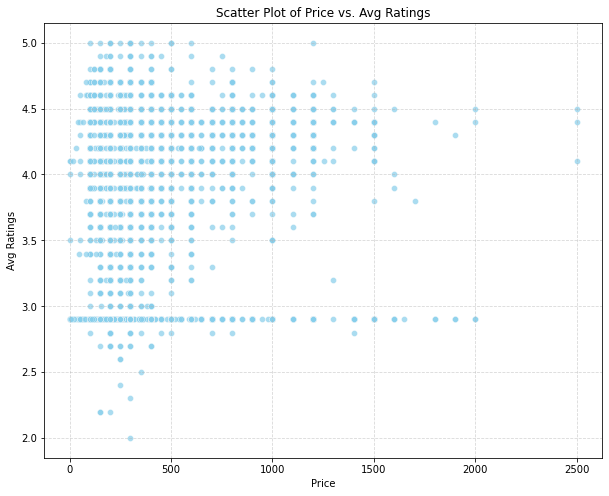

In [20]:
# Scatter plot with Price and Avg ratings
plt.figure(figsize=(10, 8))

# Plot scatter plot with Price and Avg ratings
sns.scatterplot(x='Price', y='Avg ratings', data=df, color='skyblue', alpha=0.7)
plt.title('Scatter Plot of Price vs. Avg Ratings')
plt.xlabel('Price')
plt.ylabel('Avg Ratings')

# Add grid
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

In [27]:
# Filter restaurants with total ratings less than 50
df_filtered = df[df['Total ratings'] >= 100]

# Group the filtered data by city and calculate average rating for each restaurant
city_avg_ratings = df_filtered.groupby('City')['Avg ratings'].mean()

# Iterate over each city and find the top 5 rated restaurants
top_rated_restaurants = {}
for city in city_avg_ratings.index:
    # Select restaurants belonging to the current city
    city_restaurants = df_filtered[df_filtered['City'] == city]
    
    # Sort restaurants by average rating in descending order
    top_restaurants = city_restaurants.sort_values(by='Avg ratings', ascending=False).head(5)
    
    # Store top rated restaurants for the current city
    top_rated_restaurants[city] = top_restaurants[['Restaurant', 'Avg ratings']]

# Print top rated restaurants for each city 
for city, restaurants in top_rated_restaurants.items():
    print(f"### Top 5 Rated Restaurants in {city}:")
    print("| Rank | Restaurant | Avg Rating |")
    print("|------|------------|------------|")
    for idx, row in restaurants.iterrows():
        print(f"| {idx + 1} | {row['Restaurant']} | {row['Avg ratings']:.2f} |")
    print()


### Top 5 Rated Restaurants in Ahmedabad:
| Rank | Restaurant | Avg Rating |
|------|------------|------------|
| 6787 | Natural Ice Cream | 4.80 |
| 8031 | Nic Natural Ice Creams | 4.60 |
| 2109 | Juice Pitara | 4.60 |
| 7145 | Dangee Dums Yums | 4.60 |
| 7401 | Chhaswala | 4.60 |

### Top 5 Rated Restaurants in Bangalore:
| Rank | Restaurant | Avg Rating |
|------|------------|------------|
| 7039 | Krispy Kreme | 4.70 |
| 1319 | Bombay Kulfis | 4.70 |
| 6703 | Natural Ice Cream | 4.70 |
| 778 | Happy Belly Bakes- Cakes And Desserts | 4.70 |
| 2313 | Milano Ice Cream | 4.70 |

### Top 5 Rated Restaurants in Chennai:
| Rank | Restaurant | Avg Rating |
|------|------------|------------|
| 1218 | The Grand Sweets And Snacks - Amirtham Restaurant | 4.70 |
| 5712 | Gold Fresh Juice Shop | 4.70 |
| 2151 | Havmor | 4.70 |
| 1750 | The Brownie Studio | 4.70 |
| 1614 | Cafe Clock | 4.70 |

### Top 5 Rated Restaurants in Delhi:
| Rank | Restaurant | Avg Rating |
|------|------------|----------

In [28]:
# Group the data by city and food type, and count the occurrences
city_food_counts = df.groupby(['City', 'Food type']).size().reset_index(name='Count')

# Find the most popular food type in each city
popular_food_types = city_food_counts.loc[city_food_counts.groupby('City')['Count'].idxmax()]

# Print the result
print("Most Popular Food Type in Each City:")
print(popular_food_types)

Most Popular Food Type in Each City:
           City     Food type  Count
172   Ahmedabad        Indian     53
977   Bangalore  South Indian     32
1402    Chennai        Indian     56
1952      Delhi  North Indian     47
2623  Hyderabad  South Indian     76
3113    Kolkata        Indian     66
3601     Mumbai       Chinese     64
4347       Pune       Chinese     48
4930      Surat     Fast Food     40


In [33]:
# Calculate the average rating of all restaurants in unique cities and sort in descending order
average_ratings_per_city = df.groupby('City')['Avg ratings'].mean().reset_index()
average_ratings_per_city = average_ratings_per_city.sort_values(by='Avg ratings', ascending=False)

# Print the result
print("Average Rating of All Restaurants in Unique Cities (Descending Order):")
print(average_ratings_per_city)


Average Rating of All Restaurants in Unique Cities (Descending Order):
        City  Avg ratings
2    Chennai     3.776311
1  Bangalore     3.762896
4  Hyderabad     3.701395
5    Kolkata     3.698811
6     Mumbai     3.599374
0  Ahmedabad     3.596513
8      Surat     3.580078
7       Pune     3.550183
3      Delhi     3.526350


In [35]:
# Calculate the average delivery time of all unique cities and sort in descending order
average_delivery_time_per_city = df.groupby('City')['Delivery time'].mean().reset_index()
average_delivery_time_per_city = average_delivery_time_per_city.sort_values(by='Delivery time', ascending=True)

# Print the result
print("Average Delivery Time of All Unique Cities (Descending Order):")
print(average_delivery_time_per_city)


Average Delivery Time of All Unique Cities (Descending Order):
        City  Delivery time
0  Ahmedabad      44.709902
6     Mumbai      48.318716
8      Surat      48.484375
4  Hyderabad      49.933023
1  Bangalore      50.529598
3      Delhi      50.734861
7       Pune      55.854128
2    Chennai      58.968354
5    Kolkata      67.809807


In [40]:
# Define a function to get the top 3 highest total ratings for each city
def top_n_ratings_per_city(city_group):
    top_restaurants = city_group.nlargest(3, 'Total ratings')[['Restaurant', 'Total ratings']]
    top_restaurants['City'] = city_group['City'].iloc[0]
    top_restaurants['Average rating'] = city_group['Avg ratings'].iloc[0]
    return top_restaurants

# Group the data by city and apply the function to get the top 3 highest total ratings for each city
top_ratings_per_city = df.groupby('City').apply(top_n_ratings_per_city).reset_index(drop=True)

# Print 
print("Top 3 Highest Total Ratings with Restaurant Name, Total Ratings, City, and Average Rating:")
print("| City | Restaurant | Total Ratings | Average Rating |")
print("|------|------------|---------------|----------------|")
for idx, row in top_ratings_per_city.iterrows():
    print(f"| {row['City']} | {row['Restaurant']} | {row['Total ratings']} | {row['Average rating']:.2f} |")


Top 3 Highest Total Ratings with Restaurant Name, Total Ratings, City, and Average Rating:
| City | Restaurant | Total Ratings | Average Rating |
|------|------------|---------------|----------------|
| Ahmedabad | R.K. Egg Eatery | 1000 | 4.30 |
| Ahmedabad | Anjoy Late Night Meals | 1000 | 4.30 |
| Ahmedabad | Burger King | 1000 | 4.30 |
| Bangalore | Nagarjuna Chimney | 1000 | 4.40 |
| Bangalore | The Purple Pan | 1000 | 4.40 |
| Bangalore | Truffles | 1000 | 4.40 |
| Chennai | The Bowl Company | 5000 | 4.20 |
| Chennai | The Kati Roll Shop | 1000 | 4.20 |
| Chennai | Ciclo Cafe | 1000 | 4.20 |
| Delhi | Gulab Wala | 5000 | 2.90 |
| Delhi | London Grill Co | 1000 | 2.90 |
| Delhi | Sethi Restaurant | 1000 | 2.90 |
| Hyderabad | Grand Hotel | 10000 | 2.90 |
| Hyderabad | Mehfil | 10000 | 2.90 |
| Hyderabad | Bawarchi | 10000 | 2.90 |
| Kolkata | Bachan'S Dhaba | 5000 | 4.40 |
| Kolkata | Abar Khaboo | 5000 | 4.40 |
| Kolkata | Mughal Arsalan Biryani | 5000 | 4.40 |
| Mumbai | Guru Kr

In [42]:
# Filter the DataFrame for the Hyderabad city
hyderabad_data = df[df['City'] == 'Hyderabad']

# Find the lowest and highest price in Hyderabad city along with restaurant name and average rating
lowest_price_restaurant = hyderabad_data.loc[hyderabad_data['Price'].idxmin()][['Restaurant', 'Price', 'Avg ratings']]
highest_price_restaurant = hyderabad_data.loc[hyderabad_data['Price'].idxmax()][['Restaurant', 'Price', 'Avg ratings']]

# Print the result
print("Lowest Price in Hyderabad City:")
print(lowest_price_restaurant)
print()
print("Highest Price in Hyderabad City:")
print(highest_price_restaurant)


Lowest Price in Hyderabad City:
Restaurant     Tajis Food Court
Price                         2
Avg ratings                 2.9
Name: 5030, dtype: object

Highest Price in Hyderabad City:
Restaurant     Palace Heights
Price                    1700
Avg ratings               3.8
Name: 399, dtype: object


In [43]:
# Group the data by city and area, and count the number of restaurants in each area within each city
restaurant_counts_per_area = df.groupby(['City', 'Area']).size().reset_index(name='Restaurant Count')

# Find the area with the highest number of restaurants in each city
idx = restaurant_counts_per_area.groupby('City')['Restaurant Count'].idxmax()
areas_with_highest_restaurants = restaurant_counts_per_area.loc[idx]

# Print the result
print("Area with the Highest Number of Restaurants in Each City:")
print(areas_with_highest_restaurants)


Area with the Highest Number of Restaurants in Each City:
          City           Area  Restaurant Count
52   Ahmedabad    Navrangpura               132
112  Bangalore    Indiranagar               130
205    Chennai       Perambur                89
275      Delhi         Rohini               257
331  Hyderabad  Banjara Hills               113
488    Kolkata    Bidhannagar               123
615     Mumbai        Chembur               208
717       Pune        Kothrud               149
771      Surat          Athwa                99


In [44]:
# Group the data by city and area, and calculate the mean of the "average rating" column for each area within each city
average_rating_per_area = df.groupby(['City', 'Area'])['Avg ratings'].mean().reset_index(name='Mean Avg Rating')

# Find the area with the highest mean of the "average rating" column in each city
idx = average_rating_per_area.groupby('City')['Mean Avg Rating'].idxmax()
area_with_highest_mean_rating = average_rating_per_area.loc[idx]

# Print the result
print("Area with the Highest Mean of 'Average Rating' in Each City:")
print(area_with_highest_mean_rating)


Area with the Highest Mean of 'Average Rating' in Each City:
          City                   Area  Mean Avg Rating
49   Ahmedabad            Nava Naroda              4.6
155  Bangalore           Viveka Nagar              4.6
197    Chennai               Mogapair              4.7
314      Delhi  Vardhman Premium Mall              4.8
378  Hyderabad   Kalyan Nagar X Roads              4.5
516    Kolkata            Girish Park              4.9
646     Mumbai           Matunga East              4.7
692       Pune       Dhole Patil Road              4.5
835      Surat             Umra Jakat              4.6


In [47]:
# Group the data by city and area, and calculate the mean of the "Delivery time" column for each area within each city
mean_delivery_time_per_area = df.groupby(['City', 'Area'])['Delivery time'].mean().reset_index(name='Mean Delivery Time')

# Find the area with the lowest mean delivery time and highest mean delivery time in each city
idx_min = mean_delivery_time_per_area.groupby('City')['Mean Delivery Time'].idxmin()
idx_max = mean_delivery_time_per_area.groupby('City')['Mean Delivery Time'].idxmax()

areas_with_lowest_mean_delivery_time = mean_delivery_time_per_area.loc[idx_min]
areas_with_highest_mean_delivery_time = mean_delivery_time_per_area.loc[idx_max]

# Print the result
print("Areas with the Lowest Mean Delivery Time in Each City:")
print(areas_with_lowest_mean_delivery_time)
print("\nAreas with the Highest Mean Delivery Time in Each City:")
print(areas_with_highest_mean_delivery_time)


Areas with the Lowest Mean Delivery Time in Each City:
          City                                              Area  \
57   Ahmedabad                                             Paldi   
95   Bangalore                                 Central Bengalore   
201    Chennai  Nehru Stadium Dark Kitchen Metro Manor Sydenhams   
295      Delhi                                   Sector 4 Rohini   
460  Hyderabad                              Venkateshwara Colony   
502    Kolkata                                    College Square   
635     Mumbai                                         Kurla (W)   
751       Pune                                        Somwarpeth   
801      Surat                        Moonlight Cream Sagrampura   

     Mean Delivery Time  
57            31.920000  
95            34.000000  
201           30.000000  
295           27.000000  
460           24.000000  
502           35.333333  
635           33.000000  
751           30.000000  
801           26.000000  

Are